In [1]:
import torch 
from DataLoader import *
from imports import *
lpath = '../Data/labels.bin'
dpath = '../Data/data.bin'
batch_sz = 200
dl = DataLoader(lpath, dpath, batch_sz)
gen_d = dl.get_batch()
print('loaded data')

loaded data


In [2]:
model = Model()
model.addLayer(Linear(108*108, 200))
model.addLayer(ReLU())
model.addLayer(Linear(200, 6))

In [3]:
lossClass = Criterion()
learningRate = 1e-4

In [9]:
def train(iterations, whenToPrint):
    print('training started...')
    global learningRate
    global model, gen_d, dl
    for i in range(iterations):
        # indices = (torch.randperm(dataSize)[:batchSize]).numpy()
        # currentData = data[indices, :]
        # currentLabels = labels.view(dataSize, 1)[indices, :]

        currentData, currentLabels = next(gen_d)
        #print('dbg1')
        #print(currentData)
        yPred = model.forward(currentData)
        #print(yPred)
        lossGrad, loss = lossClass.backward(yPred, currentLabels)
        #print(lossGrad, loss)
        if i%whenToPrint == 0:
            print(i, loss)
            #losses.append(loss)
            #plotIndices.append(plotIndex)
        model.clearGradParam()
        model.backward(currentData, lossGrad)
        for layer in model.Layers:
            if layer.isTrainable:
                layer.weight -= learningRate*layer.gradWeight
                layer.bias -= learningRate*layer.gradBias
        #plotIndex += 1

train(10, 3)

training started...
0 2.3911156107485296
3 2.3335040959715845
6 2.4959164690598845
9 2.3752664911746977


In [7]:
from Trainer import *
trainer = Trainer(model, dl, gen_d)
trainer.train(n_epoch=10, n_iter=30, rec_interval=3, step_interval=2, l_rate=learningRate, lossClass=lossClass)

trainer initialised
===========> starting epoch: 0, validation_accuracy:0.17, training_accuracy:0.176

epoch:0, iter:0, loss:2.925842607393861
epoch:0, iter:3, loss:2.787736643217504
epoch:0, iter:6, loss:2.762809507455677
epoch:0, iter:9, loss:2.6576247408613565
epoch:0, iter:12, loss:2.6845895195752383
epoch:0, iter:15, loss:2.6638384978612883
epoch:0, iter:18, loss:2.9065154745988546
epoch:0, iter:21, loss:3.024130993038416
epoch:0, iter:24, loss:2.8154935830459
epoch:0, iter:27, loss:2.8689621326327326
===========> starting epoch: 1, validation_accuracy:0.167, training_accuracy:0.177

epoch:1, iter:0, loss:2.759216454178095
epoch:1, iter:3, loss:2.843825200796127
epoch:1, iter:6, loss:2.846572382338345
epoch:1, iter:9, loss:2.65697804722935
epoch:1, iter:12, loss:2.6983076307177543
epoch:1, iter:15, loss:2.699804811179638
epoch:1, iter:18, loss:2.7943313527479767
epoch:1, iter:21, loss:2.793525220826268
epoch:1, iter:24, loss:2.7464169120974837
epoch:1, iter:27, loss:2.655991964004

In [5]:
trainer.training_accuracy()

0.15000000000000002

In [6]:
trainer.validation_accuracy()

0.146

In [8]:
trainer.step_record

[0, 2, 4, 6, 8]

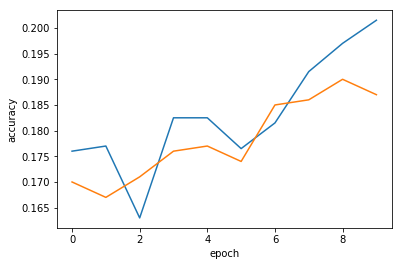

In [8]:
trainer.plot_accuracy()

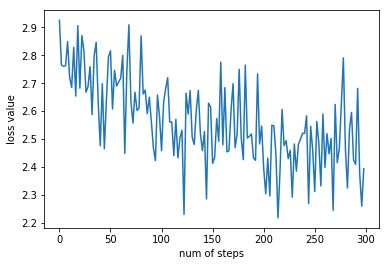

In [9]:
trainer.plot_loss()